# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

---

## Contents

- First EDA
- 독립변수 수정 / 추가
- 데이터 분석
- 레버리지 (Leverage)
- 아웃라이어 (Outlier)
- 스케일링 (Scaling)
- 변수변환 
- 다중공선성 (multicollinearity)
- 다항회귀 (Polynomial)
- 최적화 (optimization)
- 교차검증 (Cross Validation)
- 정규화 선형회귀 (Regularized)
- 최적 정규화

---

## 0. Setting 

In [1]:
from taxi_pakage import *
from encoding_data import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 추가로 필요한 함수 (지도)
from ipyleaflet import *
import time

In [3]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


---

## 1. First EDA

### 1.1 종합 EDA

#### 1.1.1 Meaning

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

#### 1.1.2 Information

In [4]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [5]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

In [6]:
# Descriptive statistics
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### 1.2 개별 변수 EDA

#### 1.2.1 Countplot

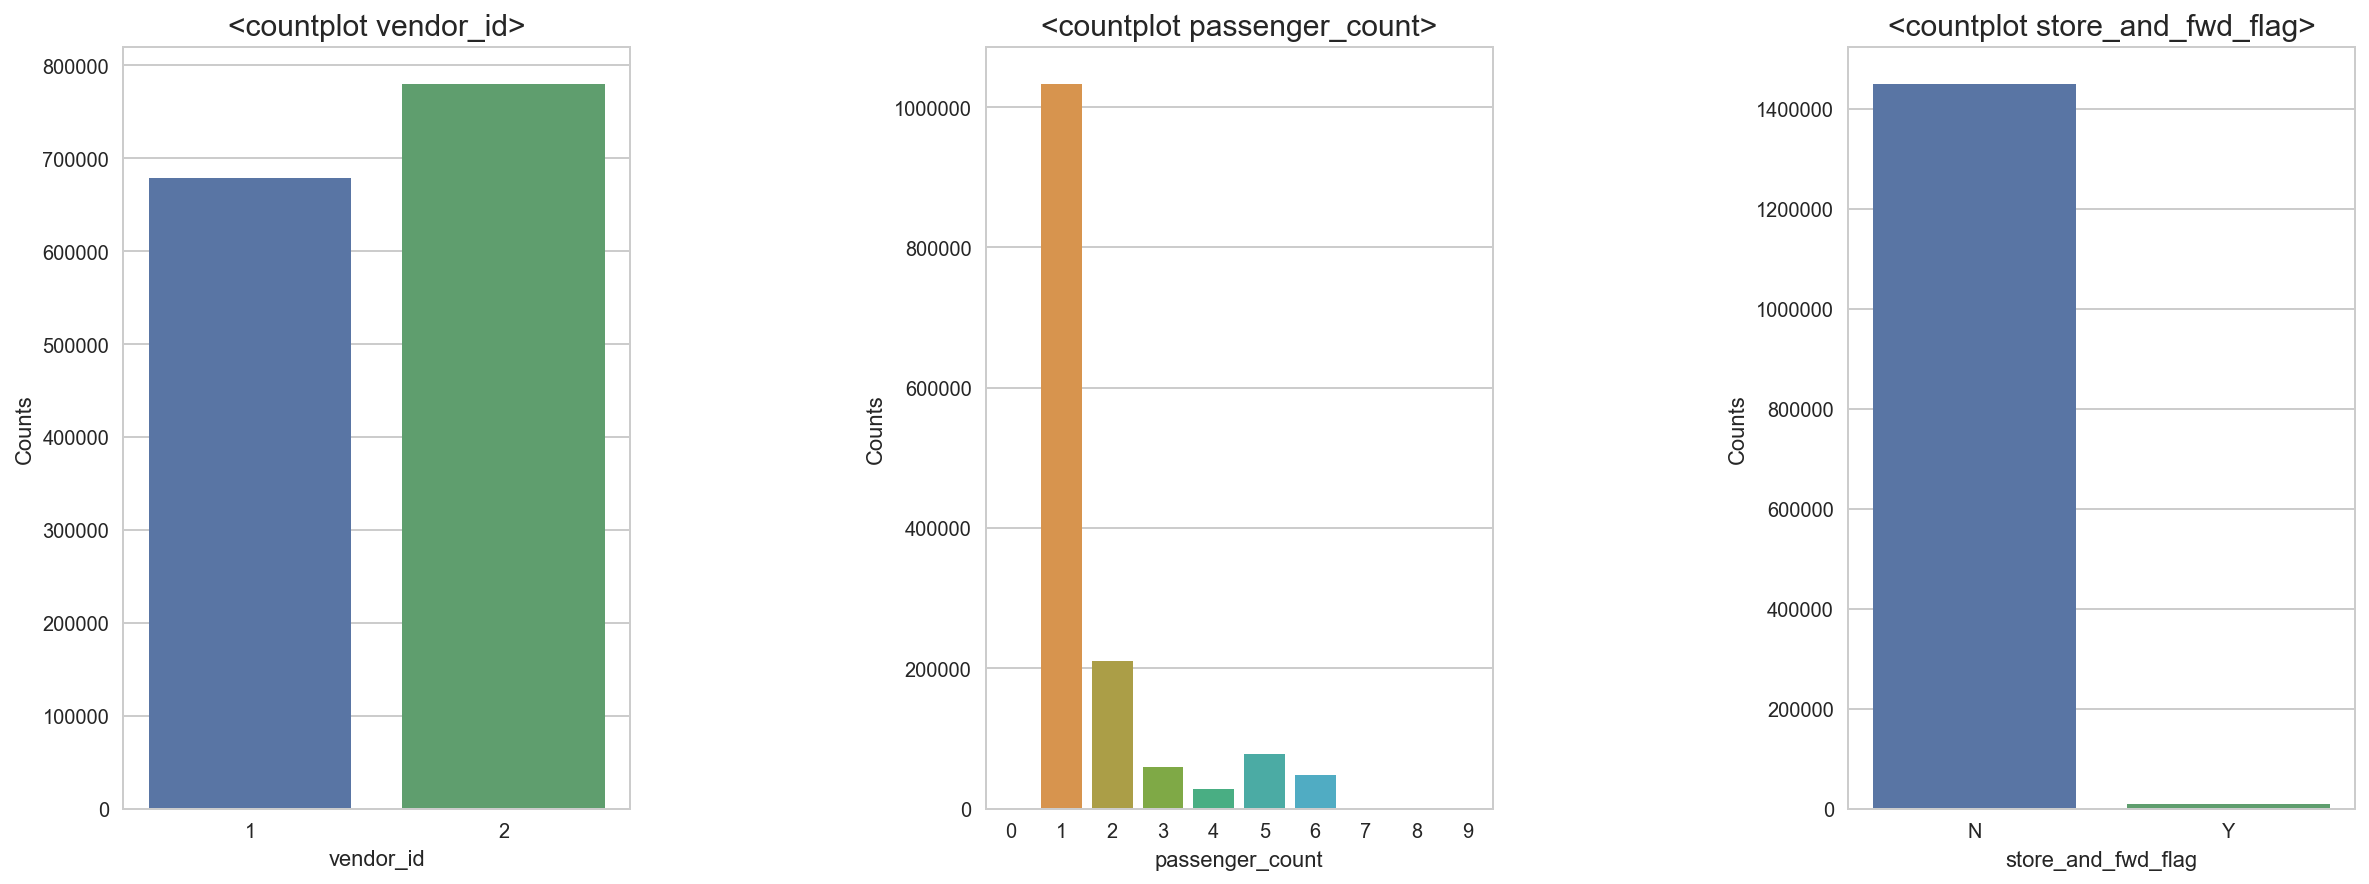

In [7]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

#### 1.2.2 Boxplot

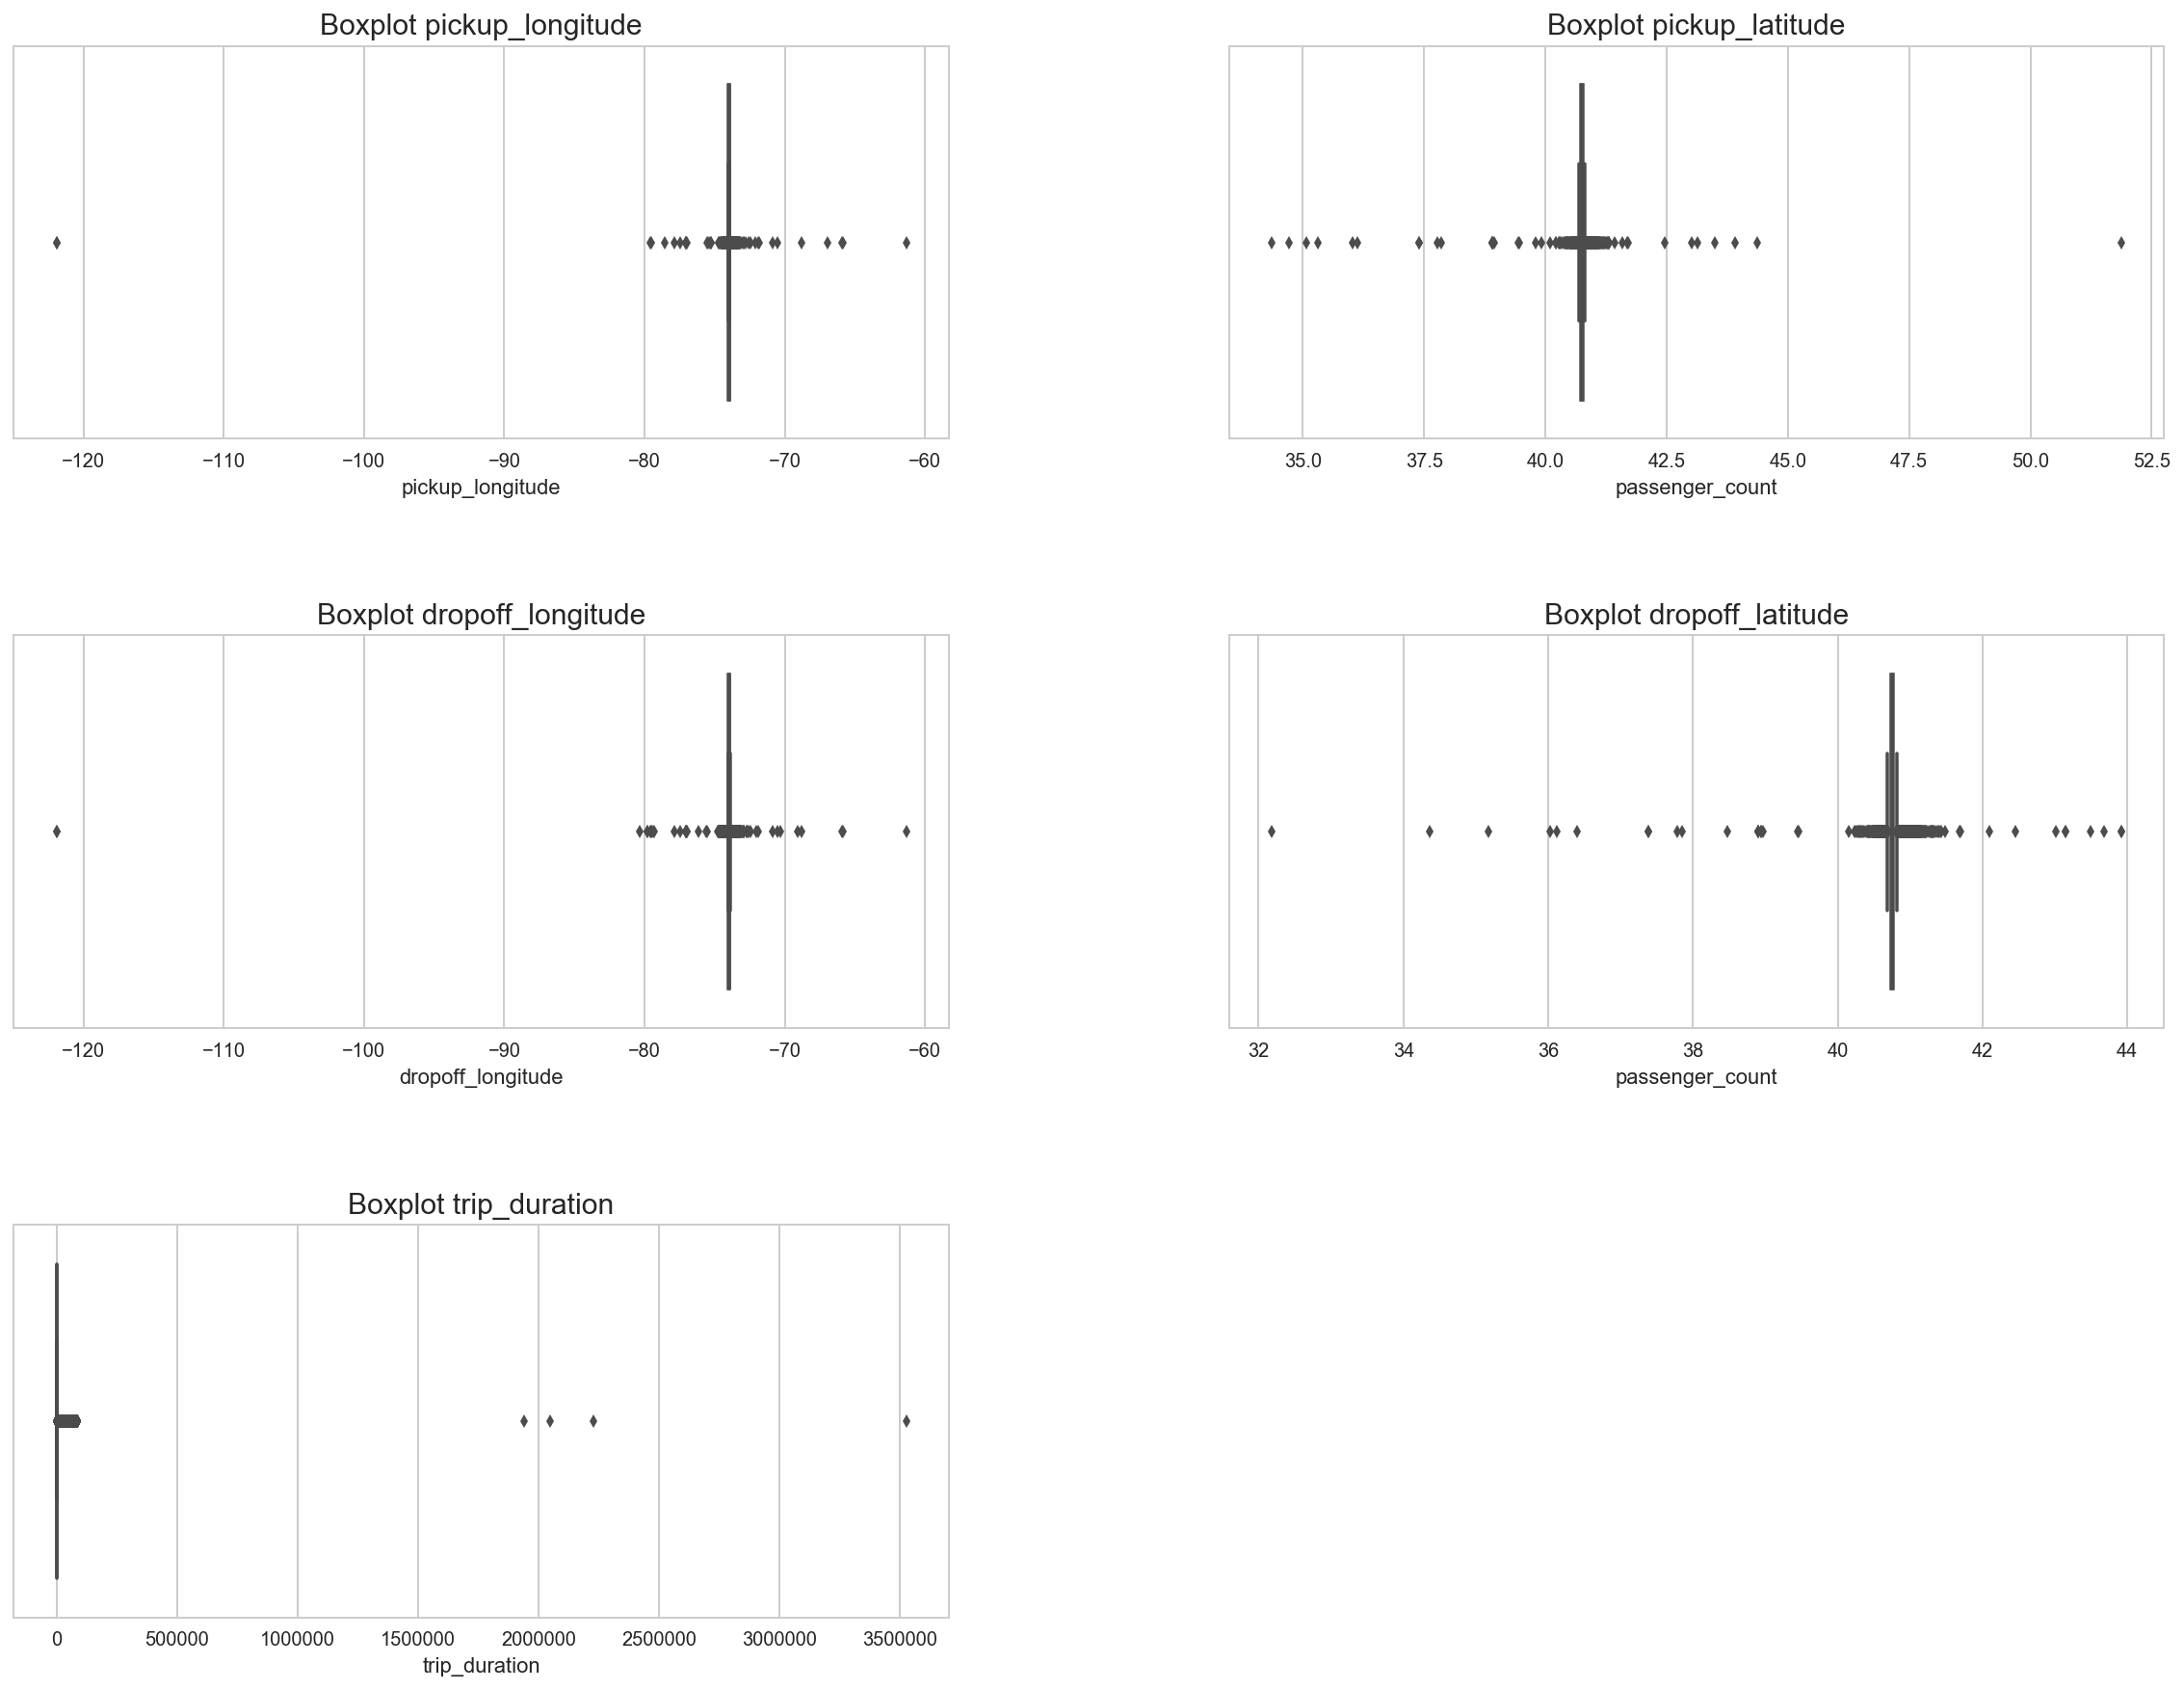

In [8]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
sns.boxplot(x = 'dropoff_longitude', data = taxi)
plt.title('Boxplot dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
sns.boxplot(x = 'dropoff_latitude', data = taxi)
plt.title('Boxplot dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('Boxplot trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

#### 1.2.3 Histogram

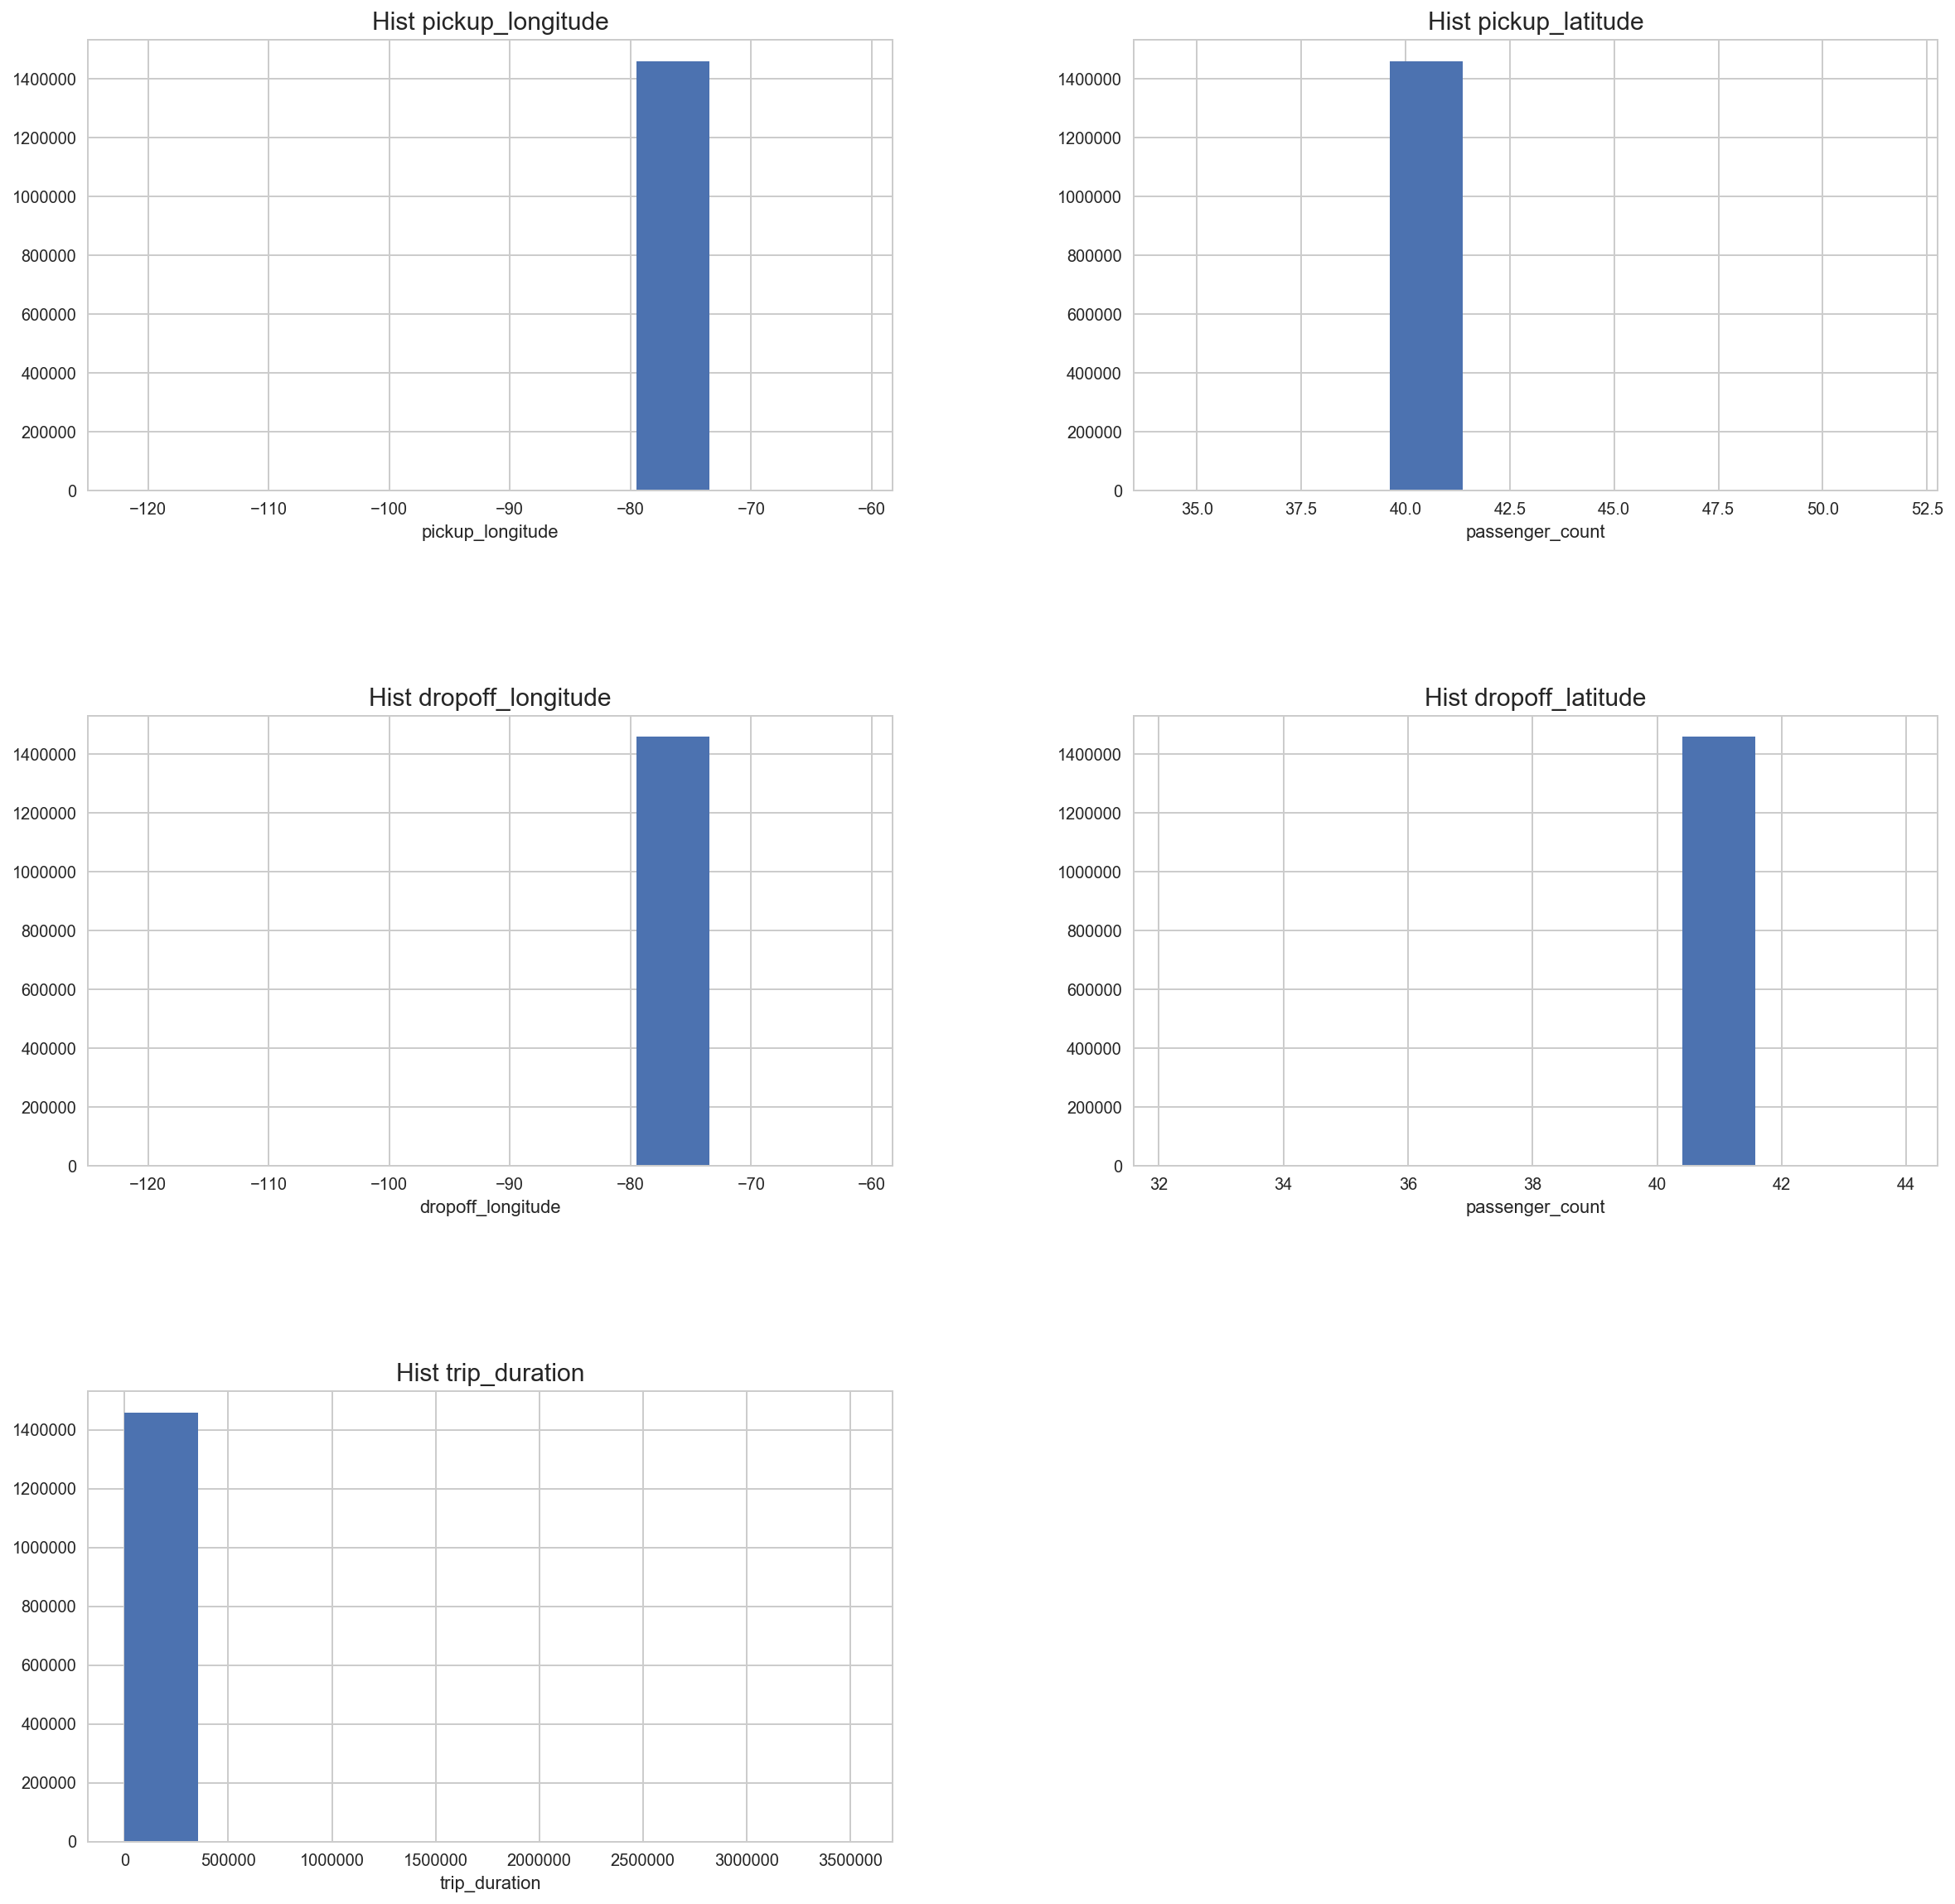

In [9]:
# histogram
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
plt.hist(x = 'pickup_longitude', data = taxi)
plt.title('Hist pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
plt.hist(x = 'pickup_latitude', data = taxi)
plt.title('Hist pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
plt.hist(x = 'dropoff_longitude', data = taxi)
plt.title('Hist dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
plt.hist(x = 'dropoff_latitude', data = taxi)
plt.title('Hist dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
plt.hist(x = 'trip_duration', data = taxi)
plt.title('Hist trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

#### 1.2.4 Map

In [10]:
# Map 표시1
center_1 = [40.7830603, -73.9712488] # [위도, 경도]
zoom_1 = 12
m = Map(center = center_1, zoom = zoom_1)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [11]:
# pick_up
taxi['pickup'] = list(zip(taxi['pickup_latitude'], taxi['pickup_longitude']))
pickup_sample = list(taxi['pickup'][0:10]) 

# Marker 표시
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)

In [12]:
# Map 표시2
center_2 = [40.7830603, -73.9712488] # [위도, 경도]
zoom_2 = 12
m = Map(center = center_2, zoom = zoom_2)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [13]:
# dropoff
taxi['dropoff'] = list(zip(taxi['dropoff_latitude'], taxi['dropoff_longitude']))
pickup= list(taxi['dropoff'][0:10]) 

# Marker 표시
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)

### 1.3 독립변수 & 종속변수 EDA

In [14]:
# Trip_duration boxplot에서 나타난 4개의 이상치 제거
taxi_EDA = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)

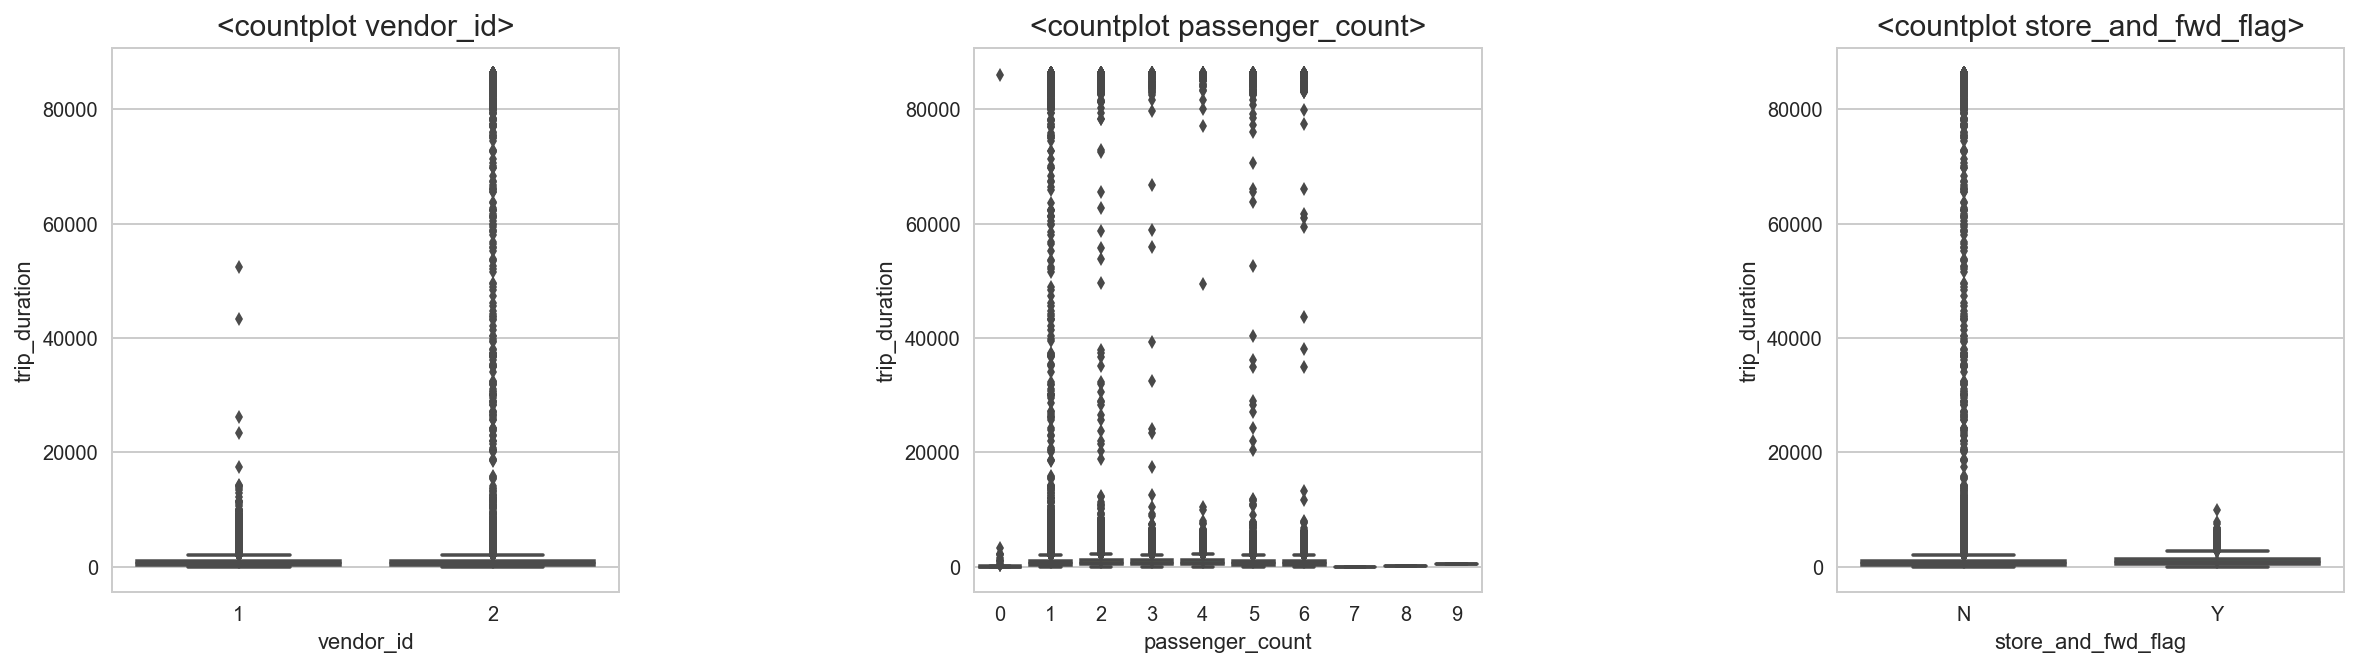

In [15]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(132)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(133)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

plt.show()

---

## 2. 독립변수 수정 / 추가

### 2.1 독립변수 수정

In [16]:
# id 숫자화 - 분석을 위해 숫자화
taxi['id'] = taxi['id'].apply(lambda x: x[2:])

# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)
taxi['dropoff_datetime'] = taxi['dropoff_datetime'].apply(strptime)

### 2.2 독립변수 추가

In [17]:
# 좌표를 이용해 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# 거리와 시간을 통해 속도를 생성 (km/h)
taxi['speed'] = taxi['dist'] / (taxi['trip_duration']/3600)

# 시간 데이터를 2016.01.01 기준으로 숫사형으로 변경
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi['drop_time'] = taxi['dropoff_datetime'].apply(time_to_zero)
taxi['weekday'] = taxi['pickup_datetime'].apply(week_num)

# holiday는 휴일인지(2) 아닌지(1) 카테고리값 부여
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday)

### 2.2 추가 독립변수 EDA

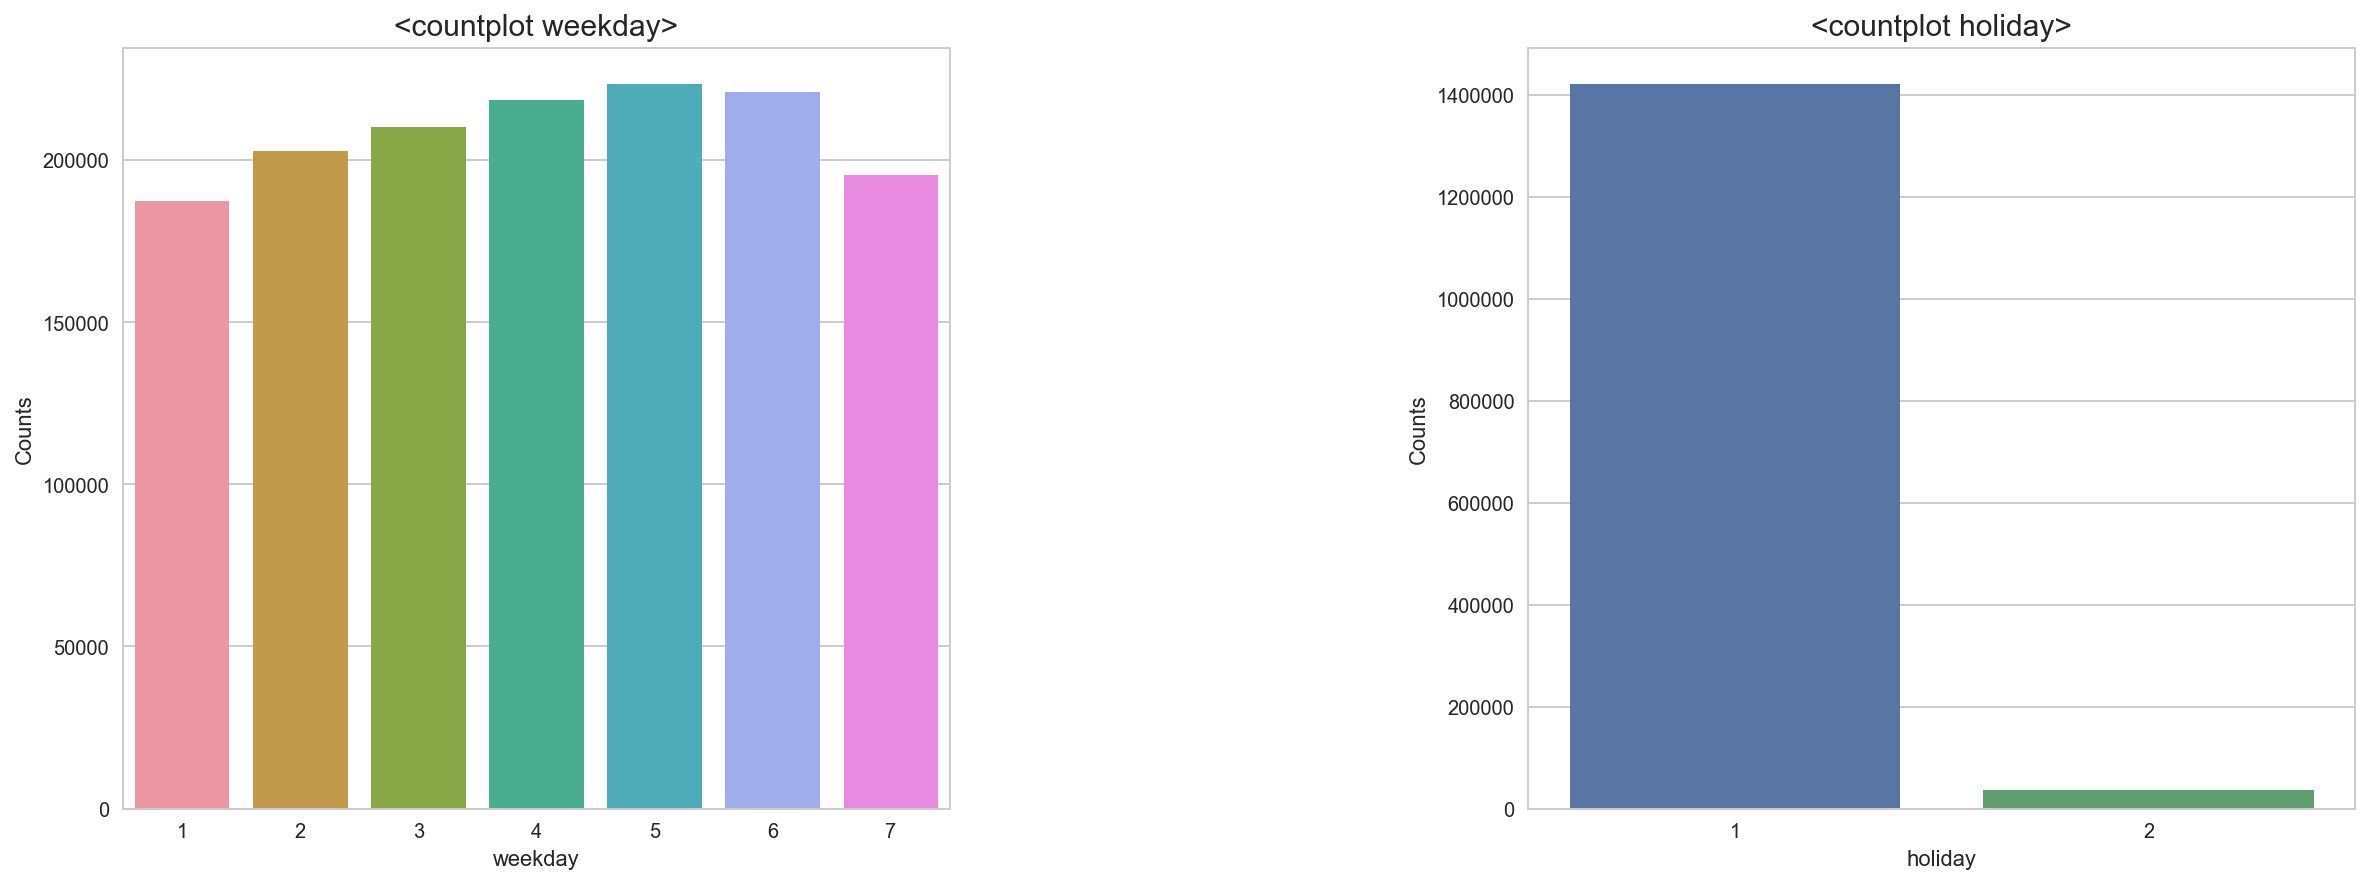

In [18]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(121)
sns.countplot(x = 'weekday', data = taxi)
plt.title('<countplot weekday>', fontsize = 15)
plt.xlabel('weekday')
plt.ylabel('Counts')

# passenger_count
plt.subplot(122)
sns.countplot(x = 'holiday', data = taxi)
plt.title('<countplot holiday>', fontsize = 15)
plt.xlabel('holiday')
plt.ylabel('Counts')

plt.show()

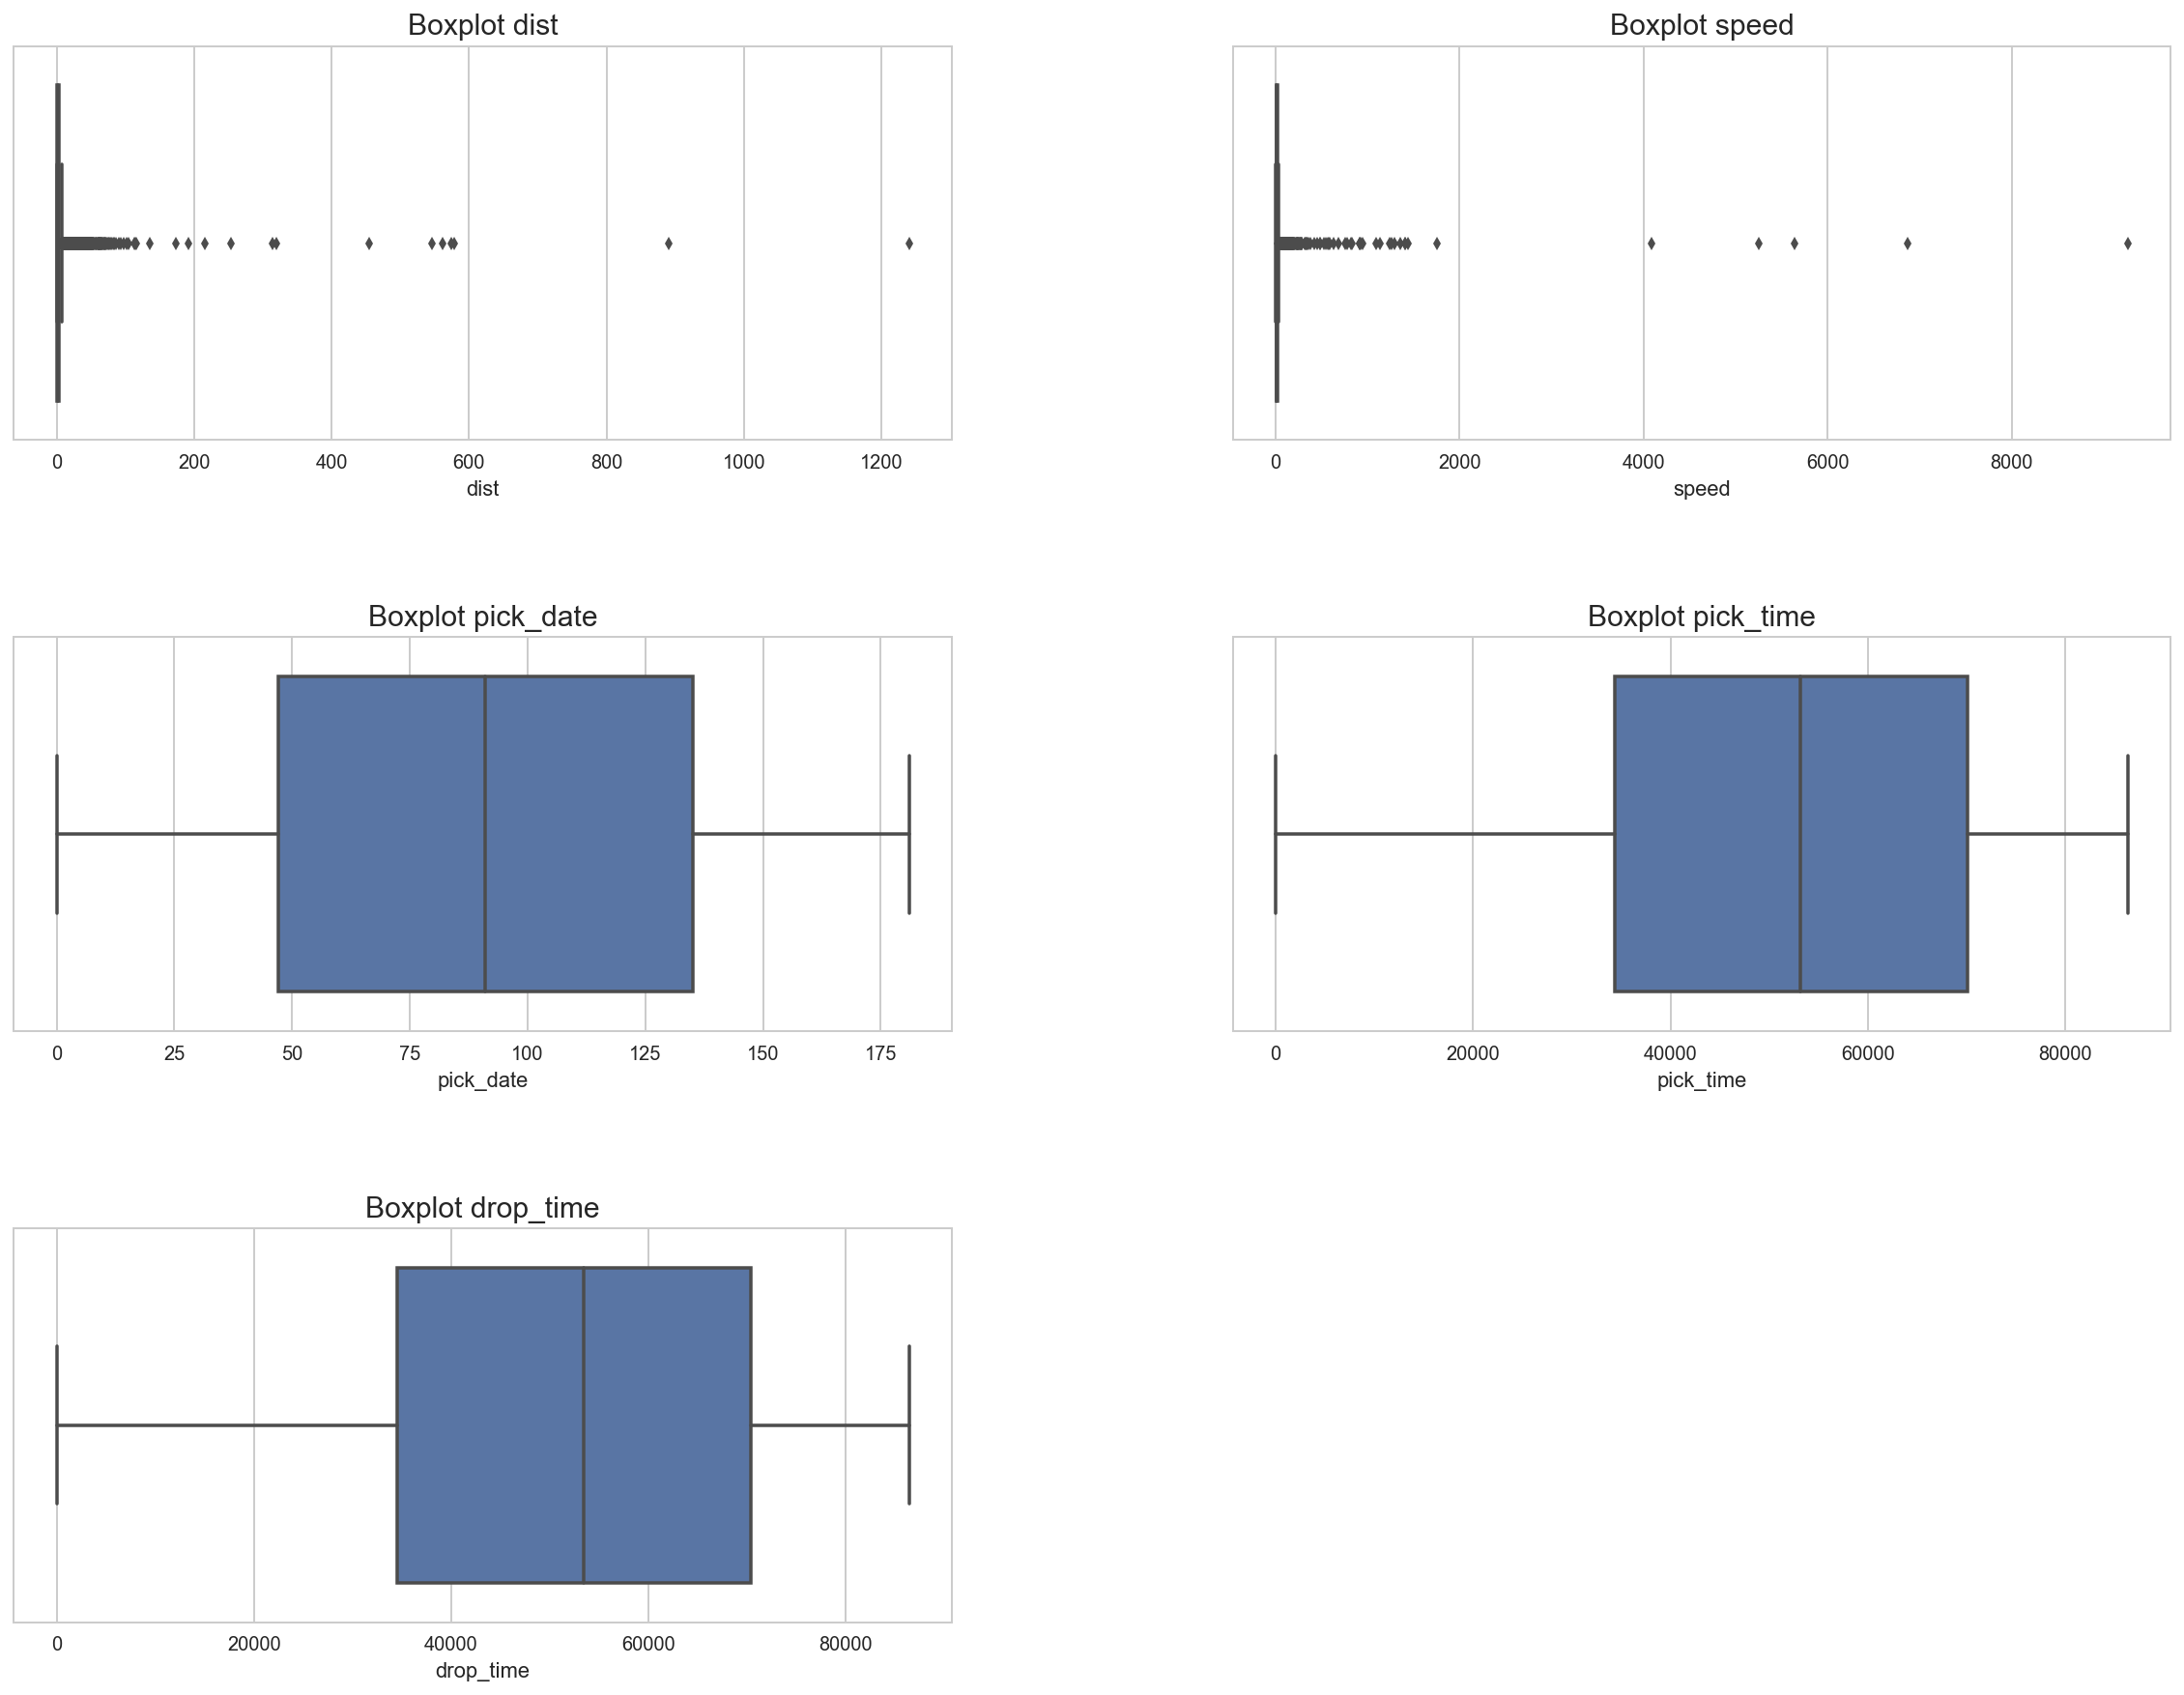

In [19]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# dist
plt.subplot(321)
sns.boxplot(x = 'dist', data = taxi)
plt.title('Boxplot dist', fontsize = 15)
plt.xlabel('dist')

# speed
plt.subplot(322)
sns.boxplot(x = 'speed', data = taxi)
plt.title('Boxplot speed', fontsize = 15)
plt.xlabel('speed')

# pick_date
plt.subplot(323)
sns.boxplot(x = 'pick_date', data = taxi)
plt.title('Boxplot pick_date', fontsize = 15)
plt.xlabel('pick_date')

# pick_time
plt.subplot(324)
sns.boxplot(x = 'pick_time', data = taxi)
plt.title('Boxplot pick_time', fontsize = 15)
plt.xlabel('pick_time')

# drop_time
plt.subplot(325)
sns.boxplot(x = 'drop_time', data = taxi)
plt.title('Boxplot drop_time', fontsize = 15)
plt.xlabel('drop_time')

plt.show()

---

## 03. EDA를 통한 Outlier 제거

### 3.1 Passenger_count 

In [20]:
taxi = taxi[taxi['passenger_count'] > 0].reset_index(drop=True)
taxi = taxi[taxi['passenger_count'] < 7].reset_index(drop=True)

### 3.2 Dist

In [21]:
taxi = taxi[taxi['dist'] > 0.7].reset_index(drop=True)
taxi = taxi[taxi['dist'] < 100].reset_index(drop=True)

### 3.3 Speed

In [22]:
taxi = taxi[taxi['speed'] > 5].reset_index(drop=True)
taxi = taxi[taxi['speed'] < 200].reset_index(drop=True)

### 3.4 Trip_duration

In [23]:
taxi = taxi[taxi['trip_duration'] > 10].reset_index(drop=True)
taxi = taxi[taxi['trip_duration'] < 18000].reset_index(drop=True)

### 3.5 최종 데이터

In [24]:
# 차후 분석을 위해 연속형 데이터, 카테고리 데이터, y(trip_duration)순으로 재배치
x = taxi['store_and_fwd_flag']
y = taxi['trip_duration'] 
taxi = taxi.drop(['pickup', 'dropoff', 'store_and_fwd_flag', 'speed', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis=1)
taxi['store_and_fwd_flag'] = x
taxi['trip_duration'] = y
taxi.to_csv('edited_taxi1.csv', index = False)

In [25]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,store_and_fwd_flag,trip_duration
count,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00,1310430.00
mean,1.53,1.67,-73.97,40.75,-73.97,40.75,3.74,90.65,50863.52,50816.72,4.06,1.03,0.01,868.94
std,0.50,1.31,0.04,0.03,0.04,0.03,4.04,51.56,23326.51,23645.77,1.96,0.16,0.07,654.95
min,1.00,1.00,-75.24,35.31,-75.57,35.17,0.70,0.00,0.00,0.00,1.00,1.00,0.00,18.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,1.43,47.00,34039.00,34067.00,2.00,1.00,0.00,433.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,2.32,91.00,53485.00,53711.00,4.00,1.00,0.00,688.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,4.21,134.00,70581.00,70809.00,6.00,1.00,0.00,1097.00
max,2.00,6.00,-72.07,41.43,-72.02,41.48,97.52,181.00,86399.00,86399.00,7.00,2.00,1.00,14171.00


## 03. 레버리지 (Leverage)

In [26]:
taxi = pd.read_csv('edited_taxi1.csv')
feature_n, features = get_features(taxi)
feature_n, features

(15,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + store_and_fwd_flag + trip_duration')

In [27]:
# 분석을 위한 데이터 셋팅 (intercept추가)
taxi = dmatrix('{}'.format(features), taxi, return_type = 'dataframe')
taxi.tail()

,Intercept,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,store_and_fwd_flag,trip_duration
1310425,1.00,2376096.00,2.00,4.00,-73.98,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,5.00,1.00,0.00,778.00
1310426,1.00,1049543.00,1.00,1.00,-74.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,7.00,1.00,0.00,655.00
1310427,1.00,2304944.00,2.00,1.00,-73.96,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,5.00,1.00,0.00,764.00
1310428,1.00,2714485.00,1.00,1.00,-73.98,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,2.00,1.00,0.00,373.00
1310429,1.00,1209952.00,1.00,1.00,-73.98,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,2.00,1.00,0.00,198.00


In [28]:
# 독립변수 X 생성
feature_n, features = get_features(taxi, 1, -1) # Intercept, trip_duration 제거
feature_n, features

(14,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + store_and_fwd_flag')

In [29]:
# 분석결과
model = sm.OLS.from_formula('trip_duration ~ {}'.format(features), data = taxi)
result = model.fit()


In [85]:
# (시간이 걸려서 일단 패스)
# influence = result.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize = (10, 2))
# plt.stem(hat)
# plt.show()

---

## 04. 아웃라이어 (Outlier)

In [30]:
taxi_1, drop = erase_outlier_np(result, taxi, feature_n, dropped=True)
len(taxi_1), len(drop)

(1228333, 82097)

In [31]:
feature_n_1, features_1 = get_features(taxi_1, 1, -1)
feature_n_1, features_1

(14,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + store_and_fwd_flag')

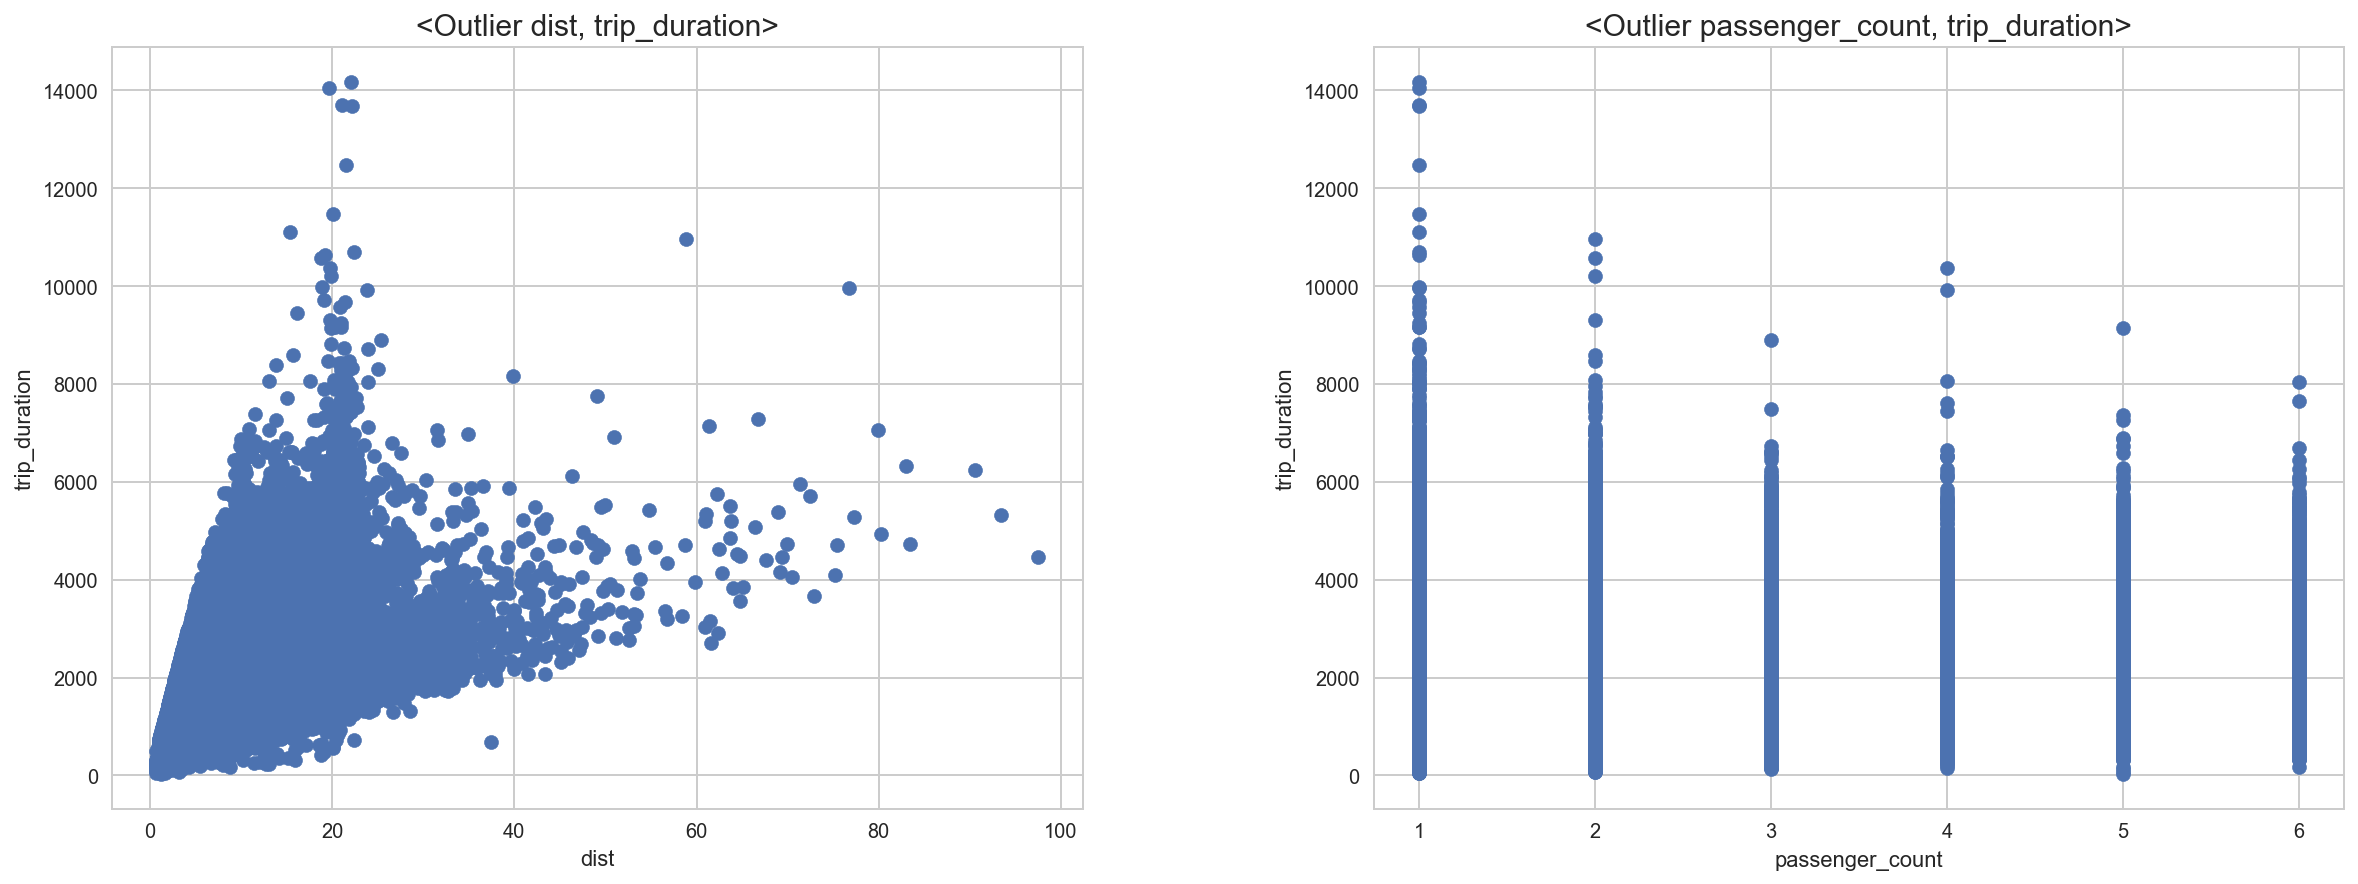

In [32]:
# Outlier
plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace = 0.3)

# outlier 제거 확인 (dist, trip_duration)
plt.subplot(121)
plt.scatter(drop['dist'], drop['trip_duration'])
plt.title('<Outlier dist, trip_duration>', fontsize = 15)
plt.xlabel('dist')
plt.ylabel('trip_duration')

# outlier 제거 확인 (passenger_count, trip_duration)
plt.subplot(122)
plt.scatter(drop['passenger_count'], drop['trip_duration'])
plt.title('<Outlier passenger_count, trip_duration>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')


plt.show()

In [33]:
model_1 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.944e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:38:22   Log-Likelihood:            -8.6414e+06
No. Observations:             1228333   AIC:                         1.728e+07
Df Residuals:                 1228318   BIC:                         1.728e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.722e+05   1179.817   -145.952      0.000   -1.75e+05    -1.7e+05
id                  3.391e-07   2.15e-07      1.577      0.115   -8.23e-08    7.61e-07
vendor_id             -1.3683      0.520     -2.632      0.008      -2.387      -0.349
passenger_count       -0.0940      0.198     -0.474      0.636      -0.483       0.295
pickup_longitude   -1164.9518      9.349   -124.613      0.000   -1183.275   -1146.629
pickup_latitude     1283.3699     11.576    110.869      0.000    1260.682    1306.058
dropoff_longitude  -1171.3997      9.948   -117.758      0.000   -1190.897   -1151.903
dropoff_latitude   -1289.5672     10.102   -127.660      0.000   -1309.366   -1269.768
dist                 150.1080      0.105   1428.817      0.000     149.902     150.314
pick_date              0.2879      0.005     59.195      0.000       0.278       0.297
pick_time             -0.0024   3.65e-05    -65.995      0.000      -0.002      -0.002
drop_time              0.0036   3.62e-05     99.686      0.000       0.004       0.004
weekday              -10.9766      0.128    -85.878      0.000     -11.227     -10.726
holiday             -116.7253      1.677    -69.605      0.000    -120.012    -113.439
store_and_fwd_flag    25.1276      4.775      5.263      0.000      15.769      34.486
==============================================================================
Omnibus:                   134737.259   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199941.812
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       4.080   Cond. No.                     1.10e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# F-test 결과 vendor_id 제거
taxi_2 = taxi_1.drop(['id', 'vendor_id', 'passenger_count'], axis = 1)
taxi_2.tail()

,Intercept,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,store_and_fwd_flag,trip_duration
1228328,1.00,-73.98,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,5.00,1.00,0.00,778.00
1228329,1.00,-74.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,7.00,1.00,0.00,655.00
1228330,1.00,-73.96,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,5.00,1.00,0.00,764.00
1228331,1.00,-73.98,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,2.00,1.00,0.00,373.00
1228332,1.00,-73.98,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,2.00,1.00,0.00,198.00


In [35]:
feature_n_2, features_2 = get_features(taxi_2, 1, -1)
feature_n_2, features_2

(11,
 'pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + store_and_fwd_flag')

In [36]:
model_2 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_2), data = taxi_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 2.474e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:38:51   Log-Likelihood:            -8.6414e+06
No. Observations:             1228333   AIC:                         1.728e+07
Df Residuals:                 1228321   BIC:                         1.728e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.722e+05   1179.794   -145.969      0.000   -1.75e+05    -1.7e+05
pickup_longitude   -1165.2677      9.348   -124.656      0.000   -1183.589   -1146.946
pickup_latitude     1283.2867     11.575    110.863      0.000    1260.599    1305.974
dropoff_longitude  -1171.3842      9.947   -117.757      0.000   -1190.881   -1151.887
dropoff_latitude   -1289.6571     10.102   -127.669      0.000   -1309.456   -1269.858
dist                 150.1070      0.105   1428.813      0.000     149.901     150.313
pick_date              0.2880      0.005     59.214      0.000       0.278       0.298
pick_time             -0.0024   3.65e-05    -65.998      0.000      -0.002      -0.002
drop_time              0.0036   3.62e-05     99.680      0.000       0.004       0.004
weekday              -10.9799      0.128    -85.938      0.000     -11.230     -10.729
holiday             -116.7530      1.677    -69.623      0.000    -120.040    -113.466
store_and_fwd_flag    25.9017      4.767      5.433      0.000      16.558      35.245
==============================================================================
Omnibus:                   134782.821   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200039.776
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       4.080   Cond. No.                     3.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

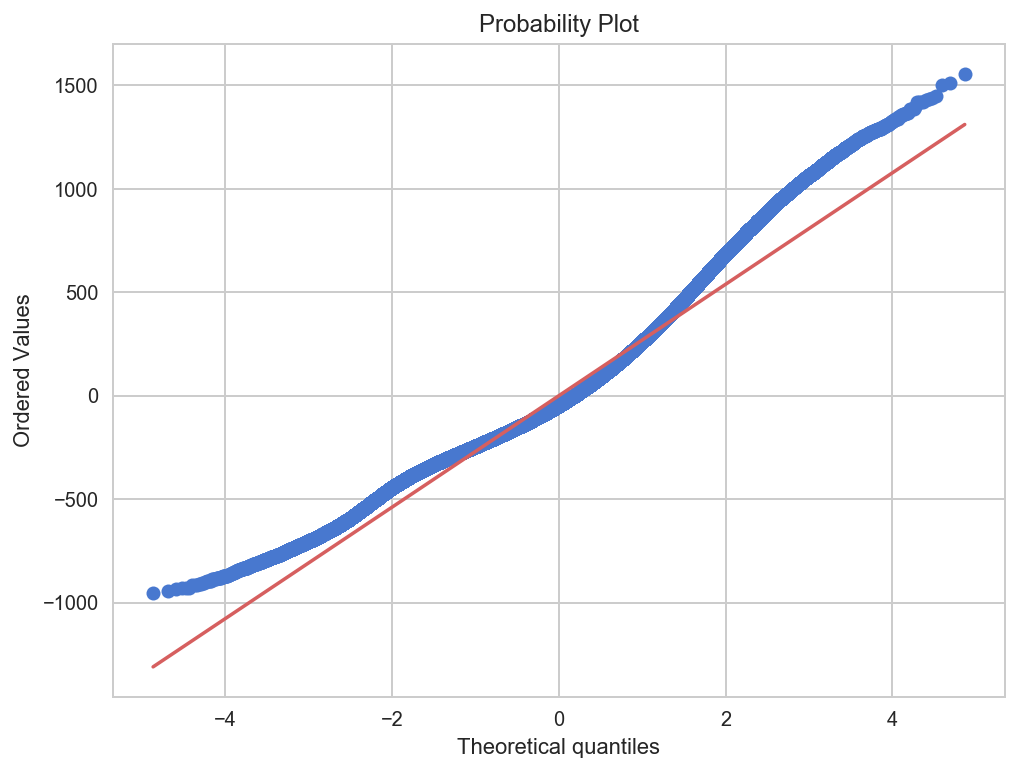

In [37]:
# 잔차 정규성
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_2.resid, plot = plt)
plt.show()

In [38]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_2.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 134782.821
P-value     :  0.000


In [39]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_2.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 200039.776
P-value     :  0.000
Skew        :  0.828
Kurtosis    :  4.080


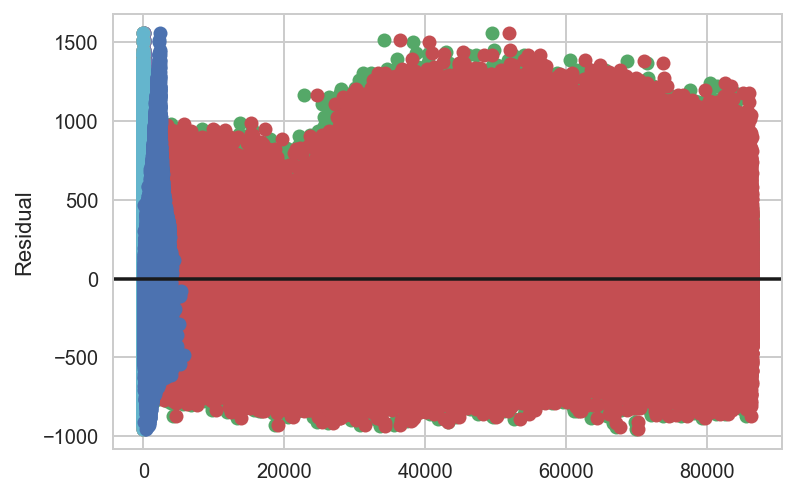

In [40]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_2, result_2.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

---

## 05. 스케일링 (scaling)

In [48]:
taxi_3 = taxi_2
taxi_3.tail()

,Intercept,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,store_and_fwd_flag,trip_duration
1228328,1.00,-73.98,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,5.00,1.00,0.00,778.00
1228329,1.00,-74.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,7.00,1.00,0.00,655.00
1228330,1.00,-73.96,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,5.00,1.00,0.00,764.00
1228331,1.00,-73.98,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,2.00,1.00,0.00,373.00
1228332,1.00,-73.98,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,2.00,1.00,0.00,198.00


In [83]:
# category 변수 제외하고 scale 진행
feature_n_3, features_3 = get_features(taxi_3, 1, -1, scale = True)
feature_n_3, features_3

(11,
 'scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time) + scale(weekday) + scale(holiday) + scale(store_and_fwd_flag)')

In [84]:
model_3 =  sm.OLS.from_formula("trip_duration ~ {} ".format(features_3), data = taxi_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 2.474e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:10:50   Log-Likelihood:            -8.6414e+06
No. Observations:             1228333   AIC:                         1.728e+07
Df Residuals:                 1228321   BIC:                         1.728e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   775.3121      0.248   3126.676      0.000     774.826     775.798
scale(pickup_longitude)     -35.6291      0.286   -124.656      0.000     -36.189     -35.069
scale(pickup_latitude)       32.7012      0.295    110.863      0.000      32.123      33.279
scale(dropoff_longitude)    -33.6989      0.286   -117.757      0.000     -34.260     -33.138
scale(dropoff_latitude)     -37.9833      0.298   -127.669      0.000     -38.566     -37.400
scale(dist)                 431.7200      0.302   1428.813      0.000     431.128     432.312
scale(pick_date)             14.8205      0.250     59.214      0.000      14.330      15.311
scale(pick_time)            -56.0775      0.850    -65.998      0.000     -57.743     -54.412
scale(drop_time)             84.7106      0.850     99.680      0.000      83.045      86.376
scale(weekday)              -21.5733      0.251    -85.938      0.000     -22.065     -21.081
scale(holiday)              -17.5314      0.252    -69.623      0.000     -18.025     -17.038
scale(store_and_fwd_flag)     1.3474      0.248      5.433      0.000       0.861       1.833
==============================================================================
Omnibus:                   134782.821   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200039.776
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       4.080   Cond. No.                         6.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

## 06. 변수변환

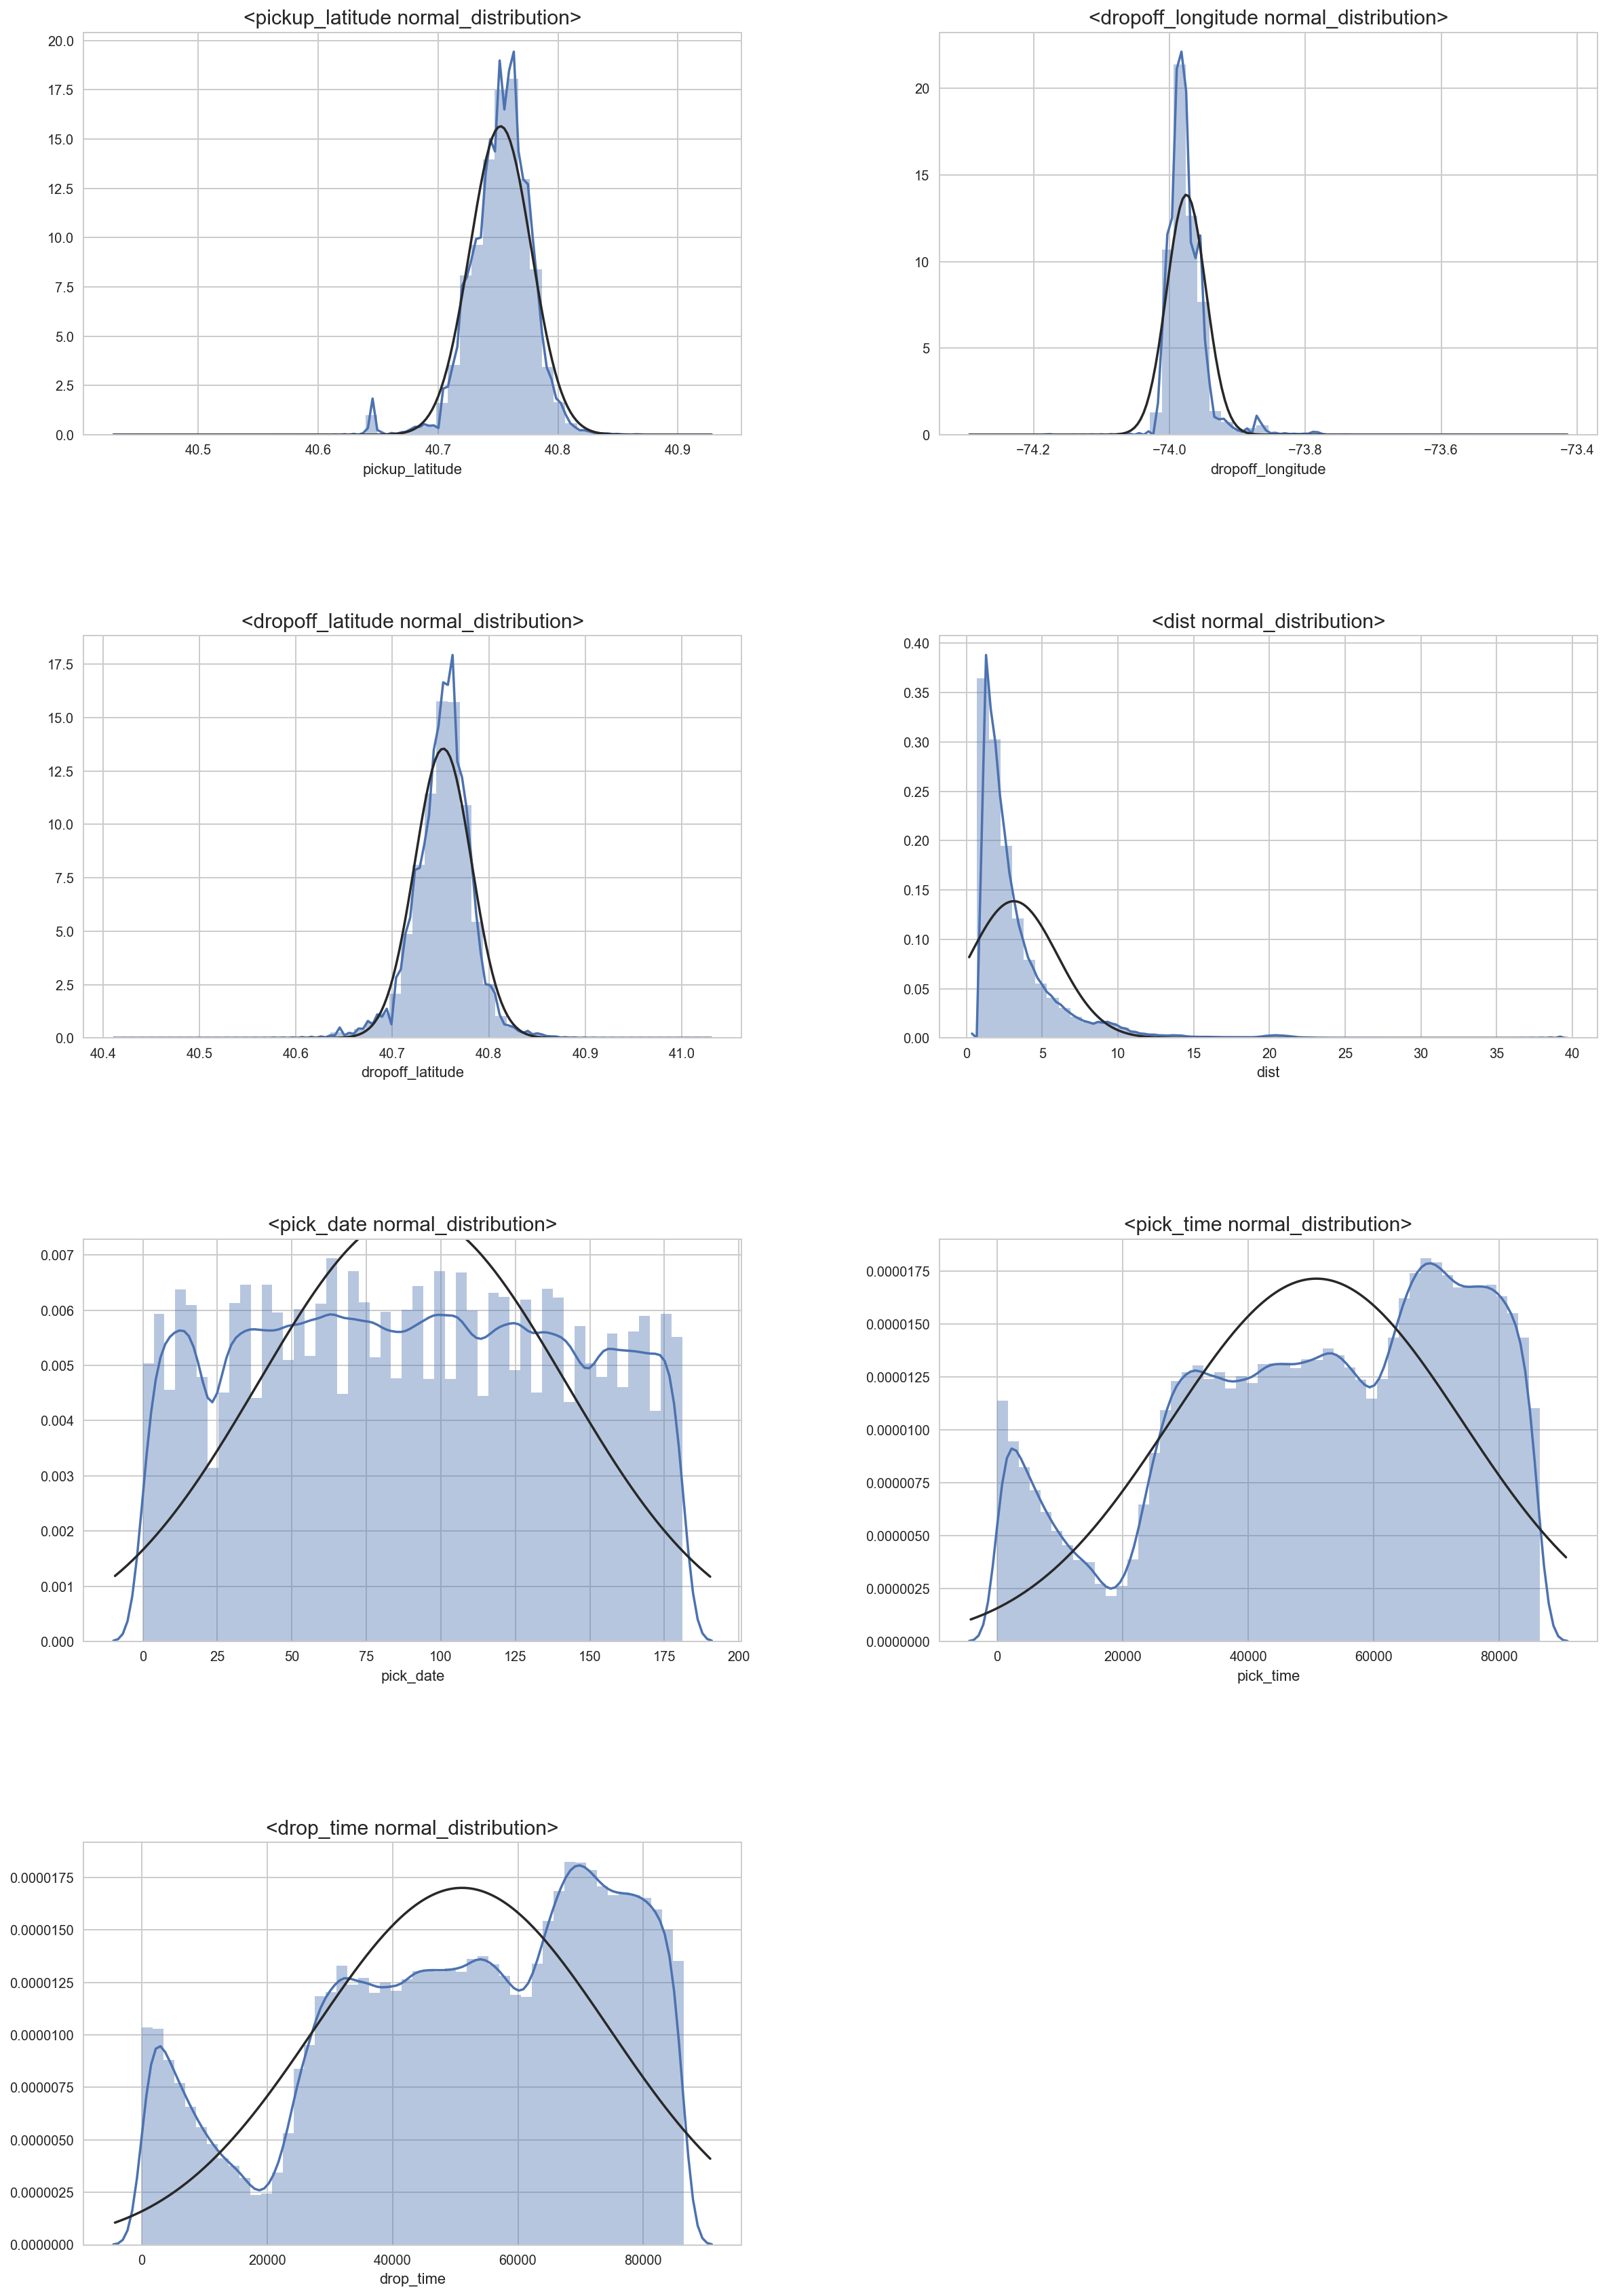

In [49]:
# 정규분포
plt.figure(figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_latitude 정규분포
plt.subplot(421)
sns.distplot(taxi_3['pickup_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<pickup_latitude normal_distribution>', fontsize = 15)

# dropoff_longitude 정규분포
plt.subplot(422)
sns.distplot(taxi_3['dropoff_longitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_longitude normal_distribution>', fontsize = 15)

# dropoff_latitude 정규분포
plt.subplot(423)
sns.distplot(taxi_3['dropoff_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_latitude normal_distribution>', fontsize = 15)

# dist 정규분포
plt.subplot(424)
sns.distplot(taxi_3['dist'], kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)

# pick_date 정규분포
plt.subplot(425)
sns.distplot(taxi_3['pick_date'], kde = True, fit = sp.stats.norm)
plt.title('<pick_date normal_distribution>', fontsize = 15)

# pick_time 정규분포
plt.subplot(426)
sns.distplot(taxi_3['pick_time'], kde=True, fit = sp.stats.norm)
plt.title('<pick_time normal_distribution>', fontsize = 15)

# drop_time 정규분포
plt.subplot(427)
sns.distplot(taxi_3['drop_time'], kde = True, fit = sp.stats.norm)
plt.title('<drop_time normal_distribution>', fontsize = 15)

plt.show()

---

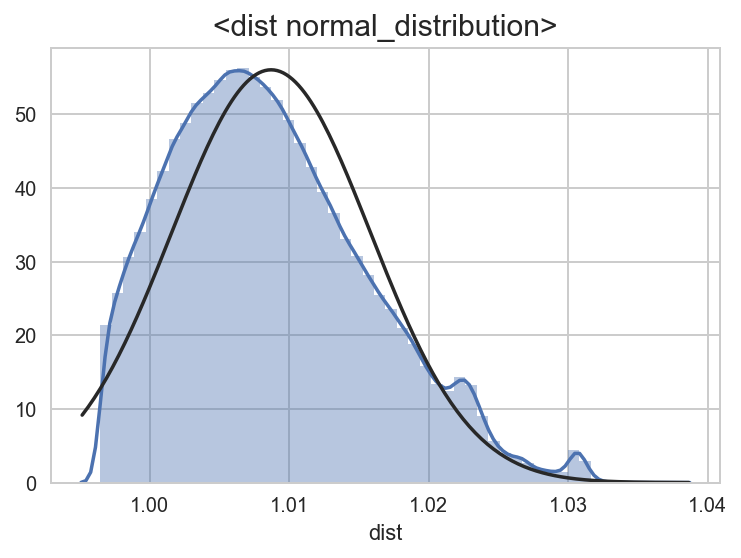

In [58]:
sns.distplot(taxi_3['dist']**0.01, kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)
plt.show()

## 08. 다중공선성

### 8.1 상관분석

In [59]:
# 상관분석
taxi_4 = taxi_3.drop(['Intercept', 'trip_duration'], axis = 1)
taxi_4.corr()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,store_and_fwd_flag
pickup_longitude,1.00,0.10,0.32,0.11,0.43,0.00,0.02,0.02,-0.02,0.00,0.01
pickup_latitude,0.10,1.00,0.11,0.49,-0.22,-0.00,0.02,0.02,-0.04,0.00,-0.00
dropoff_longitude,0.32,0.11,1.00,0.28,0.35,0.01,-0.05,-0.05,0.00,0.00,0.01
dropoff_latitude,0.11,0.49,0.28,1.00,-0.11,-0.00,0.01,0.02,-0.03,0.00,-0.00
dist,0.43,-0.22,0.35,-0.11,1.00,0.01,-0.02,-0.02,0.02,-0.01,0.01
pick_date,0.00,-0.00,0.01,-0.00,0.01,1.00,-0.01,-0.01,-0.01,-0.13,-0.00
pick_time,0.02,0.02,-0.05,0.01,-0.02,-0.01,1.00,0.96,-0.09,-0.01,0.00
drop_time,0.02,0.02,-0.05,0.02,-0.02,-0.01,0.96,1.00,-0.09,-0.01,0.00
weekday,-0.02,-0.04,0.00,-0.03,0.02,-0.01,-0.09,-0.09,1.00,-0.11,0.00
holiday,0.00,0.00,0.00,0.00,-0.01,-0.13,-0.01,-0.01,-0.11,1.00,0.00


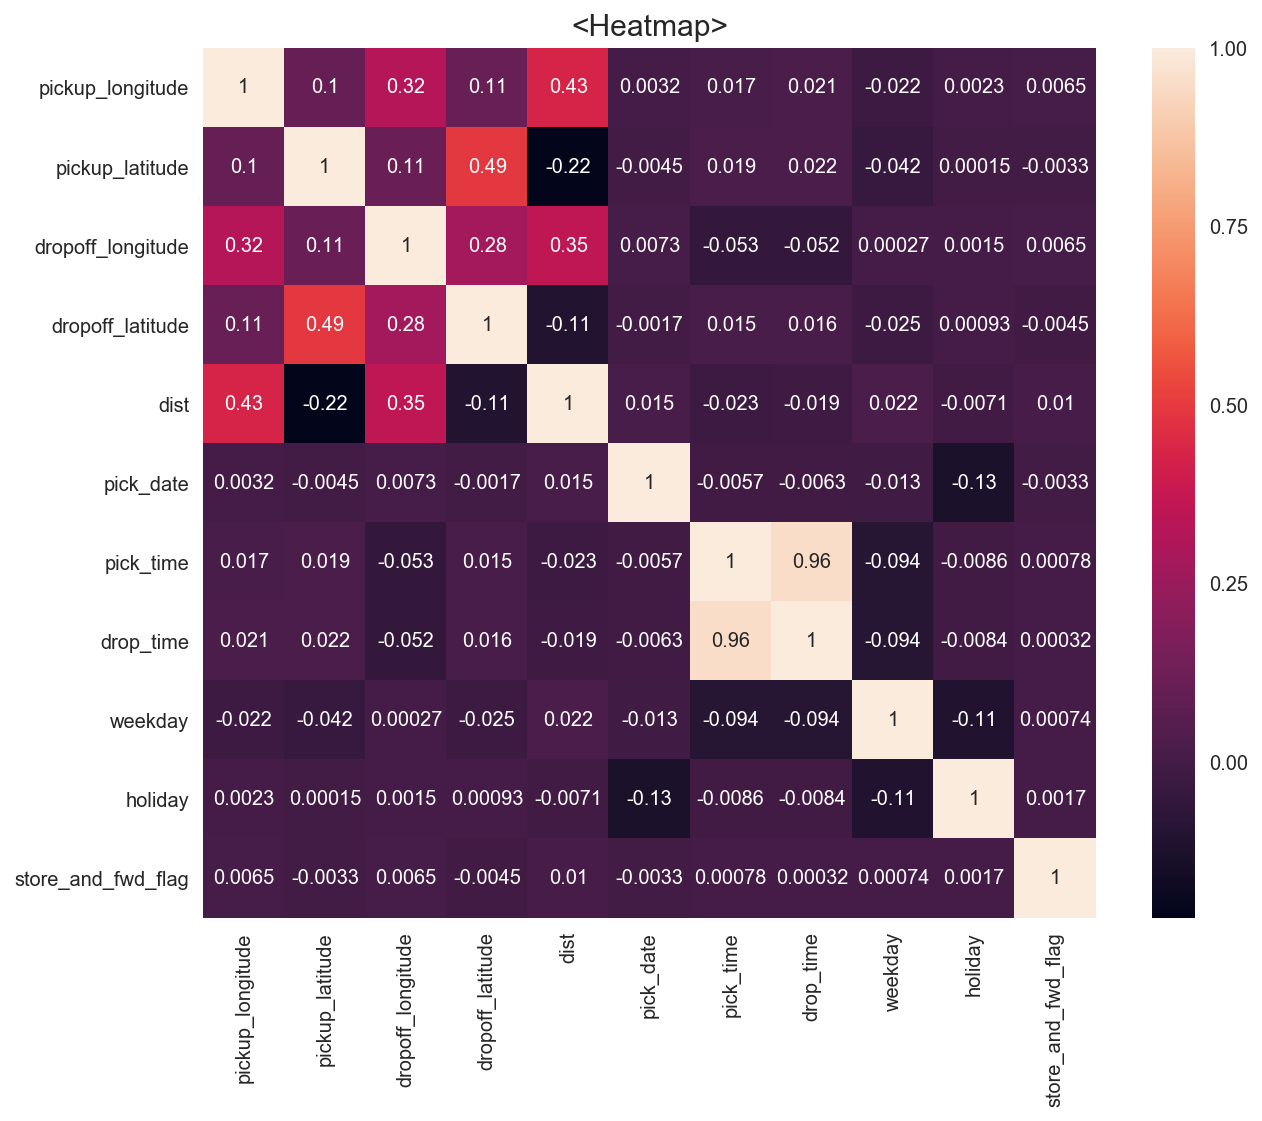

In [99]:
# heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(taxi_4.corr(), annot=True)
plt.title("<Heatmap>", fontsize = 15)
plt.show()

### 8.2 VIF (Variance Inflation Factor)

In [100]:
# VIF로 다중공선성 제거
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_4.values, i) for i in range(taxi_4.shape[1])]
vif["features"] = taxi_4.columns
vif

,VIF Factor,features
0,5300213.56,pickup_longitude
1,3158763.03,pickup_latitude
2,5167075.72,dropoff_longitude
3,2399601.76,dropoff_latitude
4,2.23,dist
5,4.16,pick_date
6,67.85,pick_time
7,67.37,drop_time
8,5.43,weekday
9,48.90,holiday


In [77]:
# 다중공선성이 높은 요인 제거
taxi_5 = taxi_3.drop(["dropoff_longitude", "dropoff_latitude", "drop_time"], axis = 1)
taxi_5.head()

,Intercept,pickup_longitude,pickup_latitude,dist,pick_date,pick_time,weekday,holiday,store_and_fwd_flag,trip_duration
0,1.00,-73.98,40.77,1.50,73.00,62694.00,1.00,1.00,0.00,455.00
1,1.00,-73.98,40.74,1.80,163.00,2614.00,7.00,1.00,0.00,663.00
2,1.00,-73.98,40.76,6.38,18.00,41723.00,2.00,1.00,0.00,2124.00
3,1.00,-74.01,40.72,1.48,96.00,70350.00,3.00,1.00,0.00,429.00
4,1.00,-73.97,40.79,1.19,85.00,48654.00,6.00,1.00,0.00,435.00


In [72]:
# VIF 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_5.values, i) for i in range(taxi_5.shape[1])]
vif["features"] = taxi_5.columns
vif

,VIF Factor,features
0,1633571.68,pickup_longitude
1,1633498.43,pickup_latitude
2,2.19,dist
3,4.16,pick_date
4,5.84,pick_time
5,5.43,weekday
6,48.90,holiday
7,1.00,store_and_fwd_flag


In [87]:
feature_n_5, features_5 = get_features(taxi_5, 1, -1, scale = True)
feature_n_5, features_5

(8,
 'scale(pickup_longitude) + scale(pickup_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(weekday) + scale(holiday) + scale(store_and_fwd_flag)')

In [88]:
model_5 =  sm.OLS.from_formula("trip_duration ~ {} ".format(features_5), data = taxi_5)
result_5 = model_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 3.201e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:20:28   Log-Likelihood:            -8.6668e+06
No. Observations:             1228333   AIC:                         1.733e+07
Df Residuals:                 1228324   BIC:                         1.733e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   775.3121      0.253   3062.663      0.000     774.816     775.808
scale(pickup_longitude)     -43.7571      0.288   -152.081      0.000     -44.321     -43.193
scale(pickup_latitude)        9.1943      0.266     34.521      0.000       8.672       9.716
scale(dist)                 422.6525      0.293   1440.958      0.000     422.078     423.227
scale(pick_date)             14.6026      0.256     57.150      0.000      14.102      15.103
scale(pick_time)             26.5363      0.254    104.280      0.000      26.038      27.035
scale(weekday)              -21.8477      0.256    -85.259      0.000     -22.350     -21.345
scale(holiday)              -17.7145      0.257    -68.911      0.000     -18.218     -17.211
scale(store_and_fwd_flag)     1.3296      0.253      5.252      0.000       0.833       1.826
==============================================================================
Omnibus:                   135139.467   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203968.787
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       4.136   Cond. No.                         1.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

## 09. 다항회귀

In [98]:
# pickup_latitude
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_latitude)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_latitude) + scale(I(pickup_latitude**2))', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 세제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_latitude) + scale(I(pickup_latitude**2)) + scale(I(pickup_latitude**3))', data = taxi_5)
result_9 = model_9.fit()
print(result_8.summary())

# 네제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_latitude) + scale(I(pickup_latitude**2)) + scale(I(pickup_latitude**3)) + scale(I(pickup_latitude**4))', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                 3.900e+04
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:51:56   Log-Likelihood:            -9.3395e+06
No. Observations:             1228333   AIC:                         1.868e+07
Df Residuals:                 1228331   BIC:                         1.868e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                775

In [97]:
# pickup_longitude
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_longitude)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_longitude) + scale(I(pickup_longitude**2))', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 세제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(I(pickup_longitude**3))', data = taxi_5)
result_9 = model_9.fit()
print(result_8.summary())

# 네제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(I(pickup_longitude**3)) + scale(I(pickup_longitude**4))', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                 1.068e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:49:59   Log-Likelihood:            -9.3075e+06
No. Observations:             1228333   AIC:                         1.861e+07
Df Residuals:                 1228331   BIC:                         1.861e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [93]:
# dist
model_6 =  sm.OLS.from_formula('trip_duration ~ scale(dist)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ scale(dist) + scale(I(dist**2))', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 세제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ scale(dist) + scale(I(dist**2)) + scale(I(dist**3))', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 네제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ scale(dist) + scale(I(dist**2)) + scale(I(dist**3)) + scale(I(dist**4))', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                 2.413e+06
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:25:30   Log-Likelihood:            -8.6913e+06
No. Observations:             1228333   AIC:                         1.738e+07
Df Residuals:                 1228331   BIC:                         1.738e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     775.3121      0.258   3002.083      

In [94]:
# pick_date
model_7 =  sm.OLS.from_formula('trip_duration ~ scale(pick_date)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ scale(pick_date) + scale(I(pick_date**2))', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 세제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ scale(pick_date) + scale(I(pick_date**2)) + scale(I(pick_date**3))', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 네제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ scale(pick_date) + scale(I(pick_date**2)) + scale(I(pick_date**3)) + scale(I(pick_date**4))', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2704.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:27:51   Log-Likelihood:            -9.3573e+06
No. Observations:             1228333   AIC:                         1.871e+07
Df Residuals:                 1228331   BIC:                         1.871e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          775.3121      0.444  

In [95]:
# pick_time
model_8 =  sm.OLS.from_formula('trip_duration ~ scale(pick_time)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ scale(pick_time) + scale(I(pick_time**2))', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 세제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ scale(pick_time) + scale(I(pick_time**2)) + scale(I(pick_time**3))', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 네제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ scale(pick_time) + scale(I(pick_time**2)) + scale(I(pick_time**3)) + scale(I(pick_time**4))', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1691.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:29:46   Log-Likelihood:            -9.3578e+06
No. Observations:             1228333   AIC:                         1.872e+07
Df Residuals:                 1228331   BIC:                         1.872e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          775.3121      0.444  

---

## 10. 최적화

---

## 11. 교차검증